### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

# DISCLAIMER: 
Al igual que muchos compañeros, me he equivocado y he realizado una regresión logística con duracion como target, cuando lo que hay que hacer es una regresión lineal sobre dicha columna.

Como he practicado la regresión logística y en este caso no tenía mucho sentido, he decidido dejar el proceso aunque sea erróneo.

Al final del ejercicio, está todo el proceso correcto.

SORRY! 

### Import the __necessary libraries__

In [50]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt 
import seaborn as sns 


## Load the `dataset`

In [26]:
df = pd.read_csv(r'/Users/IAmLeoSanchez/Documents/Data_Science/The_Bridge/GIT_HUB_LEO/Data_Science_Bootcamp_Leo/data_science_nov_20_leo/week8/day4/data/usuarios_win_mac_lin.csv')
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [27]:
### Vamos a fijar nuestro target en la columna de duracion

print('df.duracion.value_counts():\n')
print(df.duracion.value_counts())


df.duracion.value_counts():

12.0     31
11.0     25
13.0     22
7.0       2
15.0      2
         ..
146.0     1
195.0     1
230.0     1
293.0     1
14.0      1
Name: duracion, Length: 87, dtype: int64


In [28]:
#Inspeccionamos el dataframe para encontrar patrones interesantes y la relación existente entre los datos

df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [29]:
print(df.groupby('duracion').size())

duracion
1.000      1
1.064      2
1.088      1
1.105      1
1.169      1
          ..
783.000    1
798.000    1
848.000    1
872.000    1
898.000    1
Length: 87, dtype: int64


## Visualizamos los datos
- Nos deshacemos del target para ver los datos

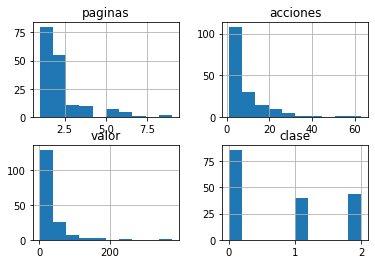

In [30]:
df.drop(['duracion'], 1).hist()
plt.show()

In [31]:
#los visualizamos en un pairplot para observar las relaciones entre columnas y eliminando los NaN

#'reg' en el argumento kind hace alusión a la regresión lineal

sns.pairplot(df.dropna(), hue='duracion', size=4, vars=['paginas', 'acciones', 'valor', 'clase'], kind='reg')
plt.show()

# En este caso, se muestran muchos puntos porque la duración tiene muchísimos valores

KeyboardInterrupt: 

## `Creamos el modelo`
- para ello, eliminamos la columna que será nuestro target
- Asignamos X e y


In [32]:
X = np.array(df.drop(['duracion'], axis=1))

#El target
y = np.array(df.duracion.astype('int'))

print('X.shape:', X.shape, '\ny.shape:', y.shape)

X.shape: (170, 4) 
y.shape: (170,)


## Ha llegado el momento de crear el modelo!!


* ### 1º: Creamos los conjuntos de entrenamiento y de test

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=15)

In [34]:
X_train.shape

(136, 4)

In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [36]:
print('#### Predicción para el conjunto de entrenamiento ####\n\n', log_reg.predict(X_train), '\n\nScore para el conjunto de entrenamiento:\n\n', log_reg.score(X_train, y_train))
print('----------------\n#### Predicción para el conjunto de test ####\n\n', log_reg.predict(X_val), '\n\nScore para el conjunto de test:\n\n', log_reg.score(X_val, y_val))

#### Predicción para el conjunto de entrenamiento ####

 [  3   2   1  12  12  12   1  12  12  12  11  11   1  11   1  12  11 739
  12  12   3  11  68  12  12  11  12   1  11  12  12  11  11  68  89  12
  12  11  12  12   1  12  12  12  12  11  11  12  11  12   1  12  12  11
  12  12  12   1  12   1   2  11  11   1  11  12  12  11  12   1   2  12
  12  11  11  89   1  11  12  12   1  11  12  12  12  12  11  12  12  11
  11  68  12  11  11   1  11  12   3  12  12  12  12  12  12  11   3  68
  68  12  11  12  12  11  12  12   1  11  12 739   2  11  11  12   2  11
  11  11  12   3  11  11  12  12  11  11] 

Score para el conjunto de entrenamiento:

 0.27205882352941174
----------------
#### Predicción para el conjunto de test ####

 [ 3 11 11 12 11 12 12  2 11 12 12 68 12 12 89 12 11 12 12 11 11 12 13 89
 12 12  1  2 11 12 11  1 12 11] 

Score para el conjunto de test:

 0.11764705882352941


In [37]:
#Mostramos las correlaciones entre columnas

df.corr()

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


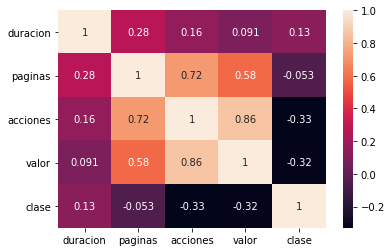

In [38]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [39]:
#Mostrando errores

#Si veis que utilizo la misma función en distintos entregables, es porque quiero familiarizarme con la terminología

def show_sklearn_metrics(y_test, predictions):
    '''
    @leosanchezsoler
    Prints significant loss functions in order to see our model error
        Arguments:
            - y_test: the target test set
            - predictions: our prediction model
        Prints:
            - MAE (Mean Absolute Error): the average error
            - MSE (Mean Squared Error): 'punishes' larger errors. More useful in the real world
            - RMSE (Root Mean Squared Error): is interpretable in the 'y' units
    '''
    print('MAE:', mean_absolute_error(y_test, predictions))
    print('\nMSE:', mean_squared_error(y_test, predictions))
    print('\nRMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

In [40]:
show_sklearn_metrics(y_test=y_val, predictions=log_reg.predict(X_val))

MAE: 94.52941176470588

MSE: 37790.23529411765

RMSE: 194.39710721643377


### El RMSE (añadir mi conclusión)

## Validación del Modelo
A continuación voy experimentar con el kfold para comprenderlo en profundidad


In [41]:
semilla = 55
porcentaje_validacion = 0.20

#Asigno las variables de los conjuntos de entrenamiento y de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=porcentaje_validacion, random_state=semilla)

In [42]:
def check_train_test_shape(X, y, X_train, y_train, X_test, y_test):
    '''
    @leosanchezsoler
    This function is used to check both training and testing sets' shape
        Arguments:
            - X: the intercept
            - y: the coef
            - X_train: the intercept's training set
            - y_train: the coef's training set
            - X_test: the intercept's test set
            - y_test: the coef's test set
    '''
    print('#### AVAILABLE DATA ####\n')
    print('X:', X.shape)
    print('y:', y.shape)
    print('\n#### TRAIN SETS ####\n')
    print('X_train:', X_train.shape)
    print('y_train:', y_train.shape)
    print('\n#### TEST SETS ####\n')
    print('X_test:', X_test.shape)
    print('y_test:', y_test.shape)

In [43]:
check_train_test_shape(X=X, y=y, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

#### AVAILABLE DATA ####

X: (170, 4)
y: (170,)

#### TRAIN SETS ####

X_train: (136, 4)
y_train: (136,)

#### TEST SETS ####

X_test: (34, 4)
y_test: (34,)


In [44]:
#Ahora procedemos a llevar a cabo la validación cruzada
#Al asignar 10 a n_splits, estoy diciendo al conjunto de datos que se parta en 10 trozos para usar la validación cruzada.
#El número de splits puede llegar a influir sobre nuestro modelo, pero todavía se me hace muy pronto ver hasta qué punto.
#Sé que influyen muchos factores, como el volumen de datos y demás, pero ya lo iré comprendiendo más adelante.

kfold= KFold(n_splits=5, random_state=semilla, shuffle=True)

#cv_results muestra los resultados de la validación cruzada por cada una de las iteraciones (splits)

cv_results = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring='accuracy')

# msg es una variable que va a mostrar la media del resultado de la validación cruzada y la desviación típica producida en el proceso de validación

msg = (cv_results.mean(), cv_results.std())
print('Cross validation results:\n', cv_results)
print('\nmsg\n\n', msg)

Cross validation results:
 [0.28571429 0.14814815 0.11111111 0.11111111 0.11111111]

msg

 (0.15343915343915343, 0.06767524637172266)


In [45]:
## Matriz de confusión
X_test[0:1]

array([[ 2,  4, 12,  1]])

In [46]:
#Aquí se muestra la probabilidad de que se dé una u otra duración
print('Prediction probability:\n',log_reg.predict_proba(X_test)[0])

#Al final, elige, de todos estas probabilidades, la más alta
print('\nProbabilidad más alta:\n', max(log_reg.predict_proba(X_test)[0]), '\nEn porcentaje:\n', round(max(log_reg.predict_proba(X_test)[0]) * 100 , 2), '%')

#Como puede observarse, la predicción que se acaba escogiendo es un valor considerablemente bajo. Esto quiere decir que el valor que se coge para la predicción tiene un 20% de probabilidad.

# Teniendo esto en cuenta, habría que reajustar los datos, probar con otra ordenación de los conjuntos y demás.

# No obstante, da la sensación de que no parece ser la regresión logística el mejor método para predecir esta clase de datos

Prediction probability:
 [0.04737213 0.05927376 0.00088299 0.01637614 0.00761289 0.2045827
 0.13350517 0.05927338 0.01057063 0.01195981 0.00844073 0.01284225
 0.01066311 0.00795458 0.01831834 0.00863253 0.0042368  0.01119646
 0.00761289 0.00912021 0.00580958 0.01965038 0.00082627 0.01367906
 0.00767159 0.00089606 0.01181365 0.00026925 0.00972378 0.00767159
 0.00801311 0.01367906 0.00700936 0.01607972 0.01220477 0.00496936
 0.00912021 0.00801311 0.00594423 0.00795458 0.01220477 0.00871292
 0.02043564 0.00183396 0.00601422 0.01615914 0.00761289 0.00665943
 0.01150546 0.01111693 0.00863253 0.01027294 0.00117683 0.00795458
 0.01276127 0.01053387 0.00041252 0.0097796  0.00041252 0.01040295
 0.00375146 0.00022733]

Probabilidad más alta:
 0.20458270295345593 
En porcentaje:
 20.46 %


In [47]:
#accuracy score es el índice de precisión 
accuracy_score(Y_test, log_reg.predict(X_test))

predictions = log_reg.predict(X_test)
predictions

NameError: name 'Y_test' is not defined

In [135]:
#Por lo que se puede ver aquí, el accuracy score no es muy alto, por lo que tal vez haya que realizar modificaciones sobre el modelo o sobre los datos
print('Accuracy score', round(accuracy_score(Y_test, predictions) * 100, 2), '%')


print('Model score', round(log_reg.score(X_test, Y_test) * 100, 2), '%')

Accuracy score 23.53 %
Model score 23.53 %


In [138]:
#Efectivamente, se observa que tanto el porcentaje de acierto como el de error, suman uno

#Gracias a esto puede observarse cómo el modelo tiene un gran porcentaje de error

acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print('Acierto:', acierto)
print('Error:', error)

print('\nError + acierto\n', error + acierto)

Acierto: 0.23529411764705882
Error: 0.7647058823529411

Error + acierto
 1.0


In [139]:
#Al mostrar la matriz de confusión, se observa que no hay muchos datos 
confusion_matrix(Y_test, predictions)

array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Aquí está el ejercicio bien hecho

## Load the `dataset`

In [3]:
df = pd.read_csv(r'/Users/IAmLeoSanchez/Documents/Data_Science/The_Bridge/GIT_HUB_LEO/Data_Science_Bootcamp_Leo/data_science_nov_20_leo/week8/day4/data/usuarios_win_mac_lin.csv')
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [24]:
# X --> Feature
X = df[['paginas', 'acciones', 'valor', 'clase']]

# y --> Target
y = df['duracion']

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (170, 4)
y shape: (170,)


### Train the model

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

check_train_test_shape(X=X, y=y, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

#### AVAILABLE DATA ####

X: (170, 4)
y: (170,)

#### TRAIN SETS ####

X_train: (136, 4)
y_train: (136,)

#### TEST SETS ####

X_test: (34, 4)
y_test: (34,)


In [54]:
# Choose the model
lin_reg = LinearRegression(n_jobs=-1)

# Train the sets
lin_reg.fit(X_train, y_train)

print('Linear Regression score on the training set:\n\n',lin_reg.score(X_train, y_train))

Linear Regression score on the training set:

 0.16689502990620186


In [56]:
# The score is very low. But let's try it with the test set

prediction = lin_reg.predict(X_test)
prediction

array([ 1.85408997e+02,  2.13436050e+02,  5.42256497e+01,  1.73295453e+02,
        6.77069120e+01,  2.16059999e+01,  1.00633695e+02,  1.68885782e+01,
        1.16288628e+02, -6.73445094e-01,  3.29129184e+01,  2.58784474e+01,
        1.79194195e+02,  1.68146102e+02,  8.53710886e+01,  1.53025003e+02,
        9.48870363e+01,  6.03228925e+02,  9.03340420e+01,  5.86854448e+01,
        1.52882546e+02,  2.58761262e+02,  9.03340420e+01, -1.87918803e-01,
        8.26802935e+01,  1.00633695e+02,  1.68885782e+01,  2.88454504e+01,
        1.16288628e+02,  2.88454504e+01,  1.16288628e+02,  5.40163312e+01,
        1.37968298e+02,  1.81898284e+02])

In [61]:
#The score is negative with the test sets, I don't know exactly why...
lin_reg.score(X_test, y_test)

-0.28315009548952497

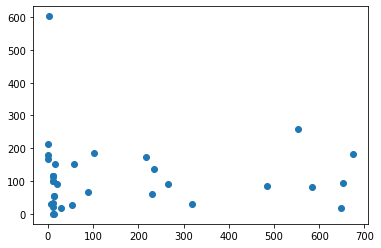

In [62]:
# As we can see, there's no correlation 
plt.scatter(y_test, prediction)

## There is not normal distribution

<AxesSubplot:ylabel='Density'>

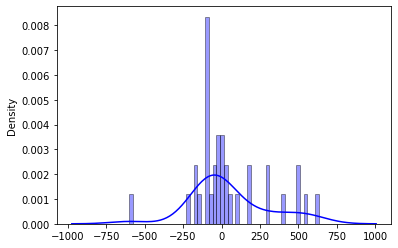

In [64]:
sns.distplot((y_test - prediction), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')